This code is under MIT license. See the License.txt file.

## Loading the libraries and dependencies

In [1]:
## Libraries ##
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import time as libtime
import seaborn as sns; sns.set()
from decimal import Decimal
import gc
plt.style.use('default')

## Home made function
from Main import *                    ## The model per se
from Numerical_functions import *     ## Few helpful functions

## Simulation

In [2]:
### Here is a description of the parameters of interest of the model:
"""
Cell:
- rc     : cell radius
- Vc     : cell volume
- Qc     : structural biomass of the cell (depends on rc)

Reproduction and death:
- gmax   : maximum of g, the division rate (of a sigmoïd function of the log-internal state of the cell)
- thresh : inflexion point of g, the rate, at which g=gmax/2 (depends on rc)
- slope  : slope in of g at g(thresh)
- kd     : maximum metabolism related decay rate (when metabolism is insufficient to fuel cell maintenance; see below)
- mort   : intrinsic metabolic rate, can be seen as a senescence term or an accidental death term. 

Metabolism:
- qmax   : maximum metabolic rate (Michaelis-Menten; depends on rc)
- ks     : half-saturation constant of the metabolism (Michaelis-Menten)
- mg     : minimum metabolic rate to fulfill the energetic requirement for cell maintainance (depends on rc)

Environment:
- QH, QC, QN, QG : inward/outward fluxes constants. From SBL (diffusion and solubilisation) for H2 (H), CO2 (C), and CH4 (G).
           From hydrothermal vents for NH4 (N). 
- Hinf, Cinf, Ninf, Ginf : abiotic equilibrium values (fixed for the moment assuming no feedback onto 
           atmospheric composition). Equals to 0 for Xo (the dead biomass)
- Still need a term describing the externalization of Xo (dead biomass). For the moment it is described by a constant 
  (burrial?).
"""

### Default parametrization
## t is time (...):
tmax        = 100                     
dt          = 0.0025                     

## Trait
rc         = 1e-6                     # µm
Vc         = (4/3)*pi*rc**3           # µm3
Qc         = (18E-12*Vc**(0.94))/10   # molX.Cell-1       Menden-Deuer and Lessard 2000
ks         = 1e-12                    # molX.L-1          arbitrary
qmax       = 1e-1                     # (d.(molX.L-1))-1  Gonzalez Cabaleiro 2015 PLOS; Kral et al. 1998
qmax       = qmax*Qc/Vc               # (d.Cell)-1
mg         = 4500                     # J.(molX.h-1)      Gonzalez Cabaleiro 2015 PLOS
mg         = 4500*24*Qc               # J.(Cell.d-1) 
kd         = 1                        # d-1               Batstone et al 2002 in GC 2015 ISME
mort       = 0.1                      # d-1               arbitrary 
thresh     = 10*Qc                    # molX.Cell-1       arbitrary
slope      = 10                       #                   arbitrary 
#gmax       = 1                        # d-1               arbitrary
gmax       = 1                        # d-1               arbitrary

## Environment (more details in Environment.py)
QH         = 1.1e-1                   # m(x100).d-1       Kharecha
QC         = 4.1e-2                   # m(x100).d-1       Kharecha
QN         = 1E-6                     # m(x100).d-1       arbitrary
QG         = 3.9e-2                   # m(x100).d-1       Kharecha
Hinf       = 7.8e-7                   # mol.L-1           Kharecha
Cinf       = 2.5e-6                   # mol.L-1           Kharecha
Ninf       = 1e-8                     # mol.L-1           arbitrary
Ginf       = 1.4e-8                   # mol.L-1           Kharecha

starters = [rc,Vc,Qc,ks,qmax,mg,kd,mort,thresh,slope,gmax]
Env = [Hinf,Cinf,Ninf,Ginf,QH,QC,QN,QG]
init = [Hinf,Cinf,Ninf,1E-10,0,1e4,thresh]
NCT,XT,HT,CT,NT,GT,XoT,D,time = Run_Profile(init,starters,Env,tmax=tmax,T=TS,dt = dt)
NCT  = np.array(NCT)
XT   = np.array(XT)
HT   = np.array(HT)
CT   = np.array(CT)
NT   = np.array(NT)
GT   = np.array(GT)
XoT  = np.array(XoT)
D    = np.array(D)
time = np.array(time)

print('done')

0
done


### Abiotic env. output 

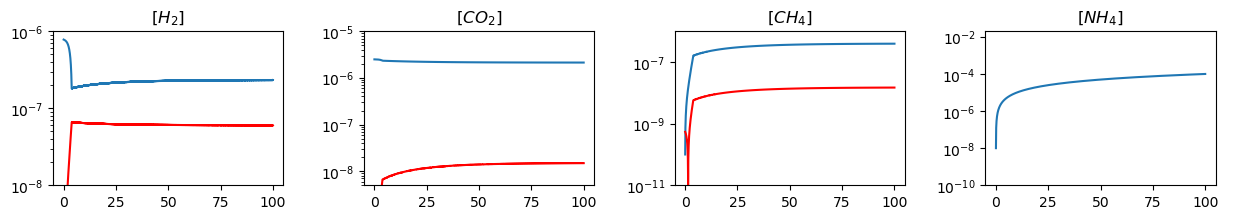

In [3]:
plt.style.use('default')

fig, dyn = plt.subplots(1,4,sharex='col')

dyn[0].semilogy(time,HT)
dyn[0].semilogy(time,QH*(Hinf-HT),color='red')
#dyn[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dyn[0].set_title('$[H_2]$')
dyn[0].patch.set_facecolor('white')
dyn[0].set_ylim([1E-8,1E-6])

dyn[1].semilogy(time,CT)
dyn[1].plot(time,QC*(Cinf-CT),color='red')
#dyn[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dyn[1].set_title('$[CO_2]$')
dyn[1].patch.set_facecolor('white')
dyn[1].set_ylim([0.5E-8,1E-5])

dyn[2].semilogy(time,(GT))
dyn[2].plot(time,abs(QG*(Ginf-GT)),color='red')
#dyn[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dyn[2].set_title('$[CH_4]$')
dyn[2].patch.set_facecolor('white')
dyn[2].set_ylim([1E-11,1E-6])

dyn[3].semilogy(time,(NT))
dyn[3].set_title('$[NH_4]$')
dyn[3].patch.set_facecolor('white')
dyn[3].set_ylim([1E-10,2E-2])

fig.set_figwidth(15)
fig.set_figheight(2)
fig.subplots_adjust(hspace=0,wspace=0.35)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#plt.xlabel('Time (day)',labelpad=20,fontsize=12.5)
#plt.ylabel('Concentrations $(mol.L^{-1})$',labelpad=20,fontsize=12.5)

plt.show()

### Organic env. output 

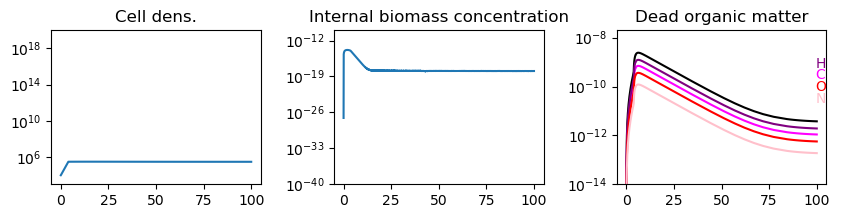

In [4]:
plt.style.use('default')

fig, dyn = plt.subplots(1,3,sharex='col')

dyn[0].semilogy(time,(NCT))
#dyn[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dyn[0].set_title('Cell dens.')
dyn[0].patch.set_facecolor('white')
dyn[0].set_ylim([1E3,1E20])

dyn[1].semilogy(time,(XT))
#dyn[0,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dyn[1].set_title('Internal biomass concentration')
dyn[1].patch.set_facecolor('white')
dyn[1].set_ylim([1E-40,1E-10])

dyn[2].semilogy(time,XoT,color='black')
dyn[2].semilogy(time,XoT*0.29,color='magenta')
dyn[2].semilogy(time,XoT*0.51,color='purple')
dyn[2].semilogy(time,XoT*0.15,color='red')
dyn[2].semilogy(time,XoT*0.05,color='pink')
dyn[2].text(max(time)-0.8,6E-10,'H',color='purple')
dyn[2].text(max(time)-0.8,(6E-10)/3,'C',color='magenta')
dyn[2].text(max(time)-0.8,(6E-10)/9,'O',color='red')
dyn[2].text(max(time)-0.8,(6E-10)/27,'N',color='pink')
#dyn[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
dyn[2].set_title('Dead organic matter')
dyn[2].set_ylim([1E-14,2E-8])

fig.set_figwidth(15*2/3)
fig.set_figheight(2)
fig.subplots_adjust(hspace=0.5,wspace=0.35)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#plt.xlabel('Time (day)',labelpad=20,fontsize=12.5)
#plt.ylabel('Concentrations $(mol.L^{-1})$',labelpad=20,fontsize=12.5)

plt.show()